In [1]:
import matplotlib.image as img
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# converting the greyscale image into a 256x256 matrix

image = img.imread('85.jpg')

In [9]:
# Eigen Value Decomposition

eigen_values, eigen_vectors = np.linalg.eig(image)

In [10]:
# sorting eigen values and arranging corresponding eigen vectors, by sorting a temporary list of (eigen values, index) tuples

temp1 = []
for i in range(256) : 
    temp1.append((abs(eigen_values[i]),eigen_values[i].real,i))

temp1.sort(reverse=True)

eigen_values_sorted = np.empty(shape=256, dtype=complex)

for i in range(256) : 
    eigen_values_sorted[i] =  eigen_values[temp1[i][2]]

eigen_vectors_sorted = np.array(eigen_vectors[:,temp1[0][2]])

for i in range(1,256) : 
    eigen_vectors_sorted = np.c_[eigen_vectors_sorted, eigen_vectors[:,temp1[i][2]]]

In [13]:
k = 199

# incrementing the value of k so as to include the complex conjugate of any complex eigen value
# increments k by 1 if the magnitude of kth eigen value is equal to the magnitude of the (k+1)th eigen value
# and sum of imaginary parts are zero, until they are no longer equal 
while(k<256 and k>0) : 
    if((temp1[k-1][0] == temp1[k][0]) and (eigen_values_sorted[temp1[k-1][2]].imag + eigen_values_sorted[temp1[k][2]].imag == 0) and (eigen_values_sorted[temp1[k][2]].imag != 0)) :
        k += 1
    else :
        break

# compute the sorted eigen value matrix, the corresponding eigen vector matrix and its inverse
P = np.copy(eigen_vectors_sorted)
P_inverse = np.linalg.inv(P)
D = np.diag(eigen_values_sorted)

# approx = P[:,:k] @ D[:k,:k] @ P_inverse[:k,:]

In [14]:
# imgplot = plt.imshow(abs(approx), cmap = "gray")

In [4]:
# Singular Value Decomposition

# creating a copy of the image matrix into an array with data type as int, so as to prevent overflow when the matrix is multiplied with its transpose
image1 = np.array(image,dtype=int)

# U is the eigen vector matrix of A.(At)
# singular values are the square root of the eigen values of A.(At)
# Vt is obtained from the equation : A = U.S.Vt, by multiplying both sides with U_inverse and S_inverse
U = np.linalg.eig(image1 @ image1.transpose())[1]
singluar_values = np.sqrt(np.linalg.eig(image1 @ image1.transpose())[0])
Vt = np.linalg.inv(np.diag(singluar_values)) @ np.linalg.inv(U) @ image1

In [16]:
# sorting singular values and arranging corresponding right and left singular vectors,
# by sorting a temporary list of (eigen values, right singular vector, left singluar vector) tuples
temp2 = []
for i in range(256) : 
    temp2.append((singluar_values[i], U[:,i], Vt[i,:]))
temp2.sort(reverse=True)

singluar_values_sorted = np.empty(shape=(256))
singluar_values_sorted[0] = temp2[0][0]

U_sorted = np.array(temp2[0][1])

Vt_sorted = np.array(temp2[0][2])

for i in range(1,256) : 
    singluar_values_sorted[i] = temp2[i][0]
    U_sorted = np.c_[U_sorted, temp2[i][1]]
    # V_sorted = np.c_[V_sorted, temp[i][2]]
    Vt_sorted = np.vstack([Vt_sorted, temp2[i][2]])

In [17]:
# approx2 = U_sorted[:,:k] @ np.diag(singluar_values_sorted)[:k,:k] @ Vt_sorted[:k,:]

In [18]:
# imgplot = plt.imshow(approx2, cmap = "gray")

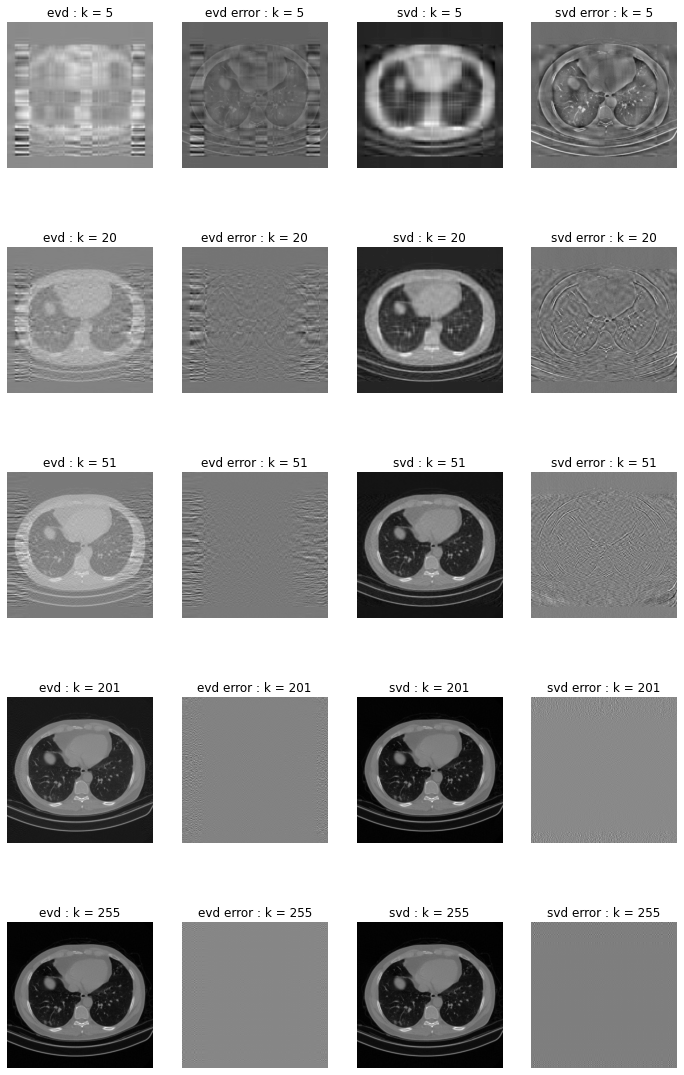

In [24]:
fig, ax = plt.subplots(5, 4, figsize=(12, 20)) 
curr_fig=0
for k in [5, 20, 50, 200, 255]:  
  # incrementing the value of k so as to include the complex conjugate of any complex eigen value
  # checks if the magnitude of kth eigen value is equal to the magnitude of the (k+1)th eigen value and sum of imaginary parts are zero, given they are not purely real
    if((k!=255) and (temp1[k+1][0] == temp1[k][0]) and (eigen_values_sorted[temp1[k+1][2]].imag + eigen_values_sorted[temp1[k][2]].imag == 0) and (eigen_values_sorted[temp1[k][2]].imag != 0)) :
        k += 1

    approx_evd = P[:,:k] @ D[:k,:k] @ P_inverse[:k,:]
    approx_svd = U_sorted[:,:k] @ np.diag(singluar_values_sorted)[:k,:k] @ Vt_sorted[:k,:]
    ax[curr_fig][0].imshow(approx_evd.real,cmap="gray")
    ax[curr_fig][0].set_title("evd : k = "+str(k))
    ax[curr_fig,0].axis("off")
    ax[curr_fig][1].imshow((image - approx_evd.real),cmap="gray")
    ax[curr_fig][1].set_title("evd error : k = "+str(k))
    ax[curr_fig,1].axis("off")
    ax[curr_fig][2].imshow(approx_svd,cmap="gray")
    ax[curr_fig][2].set_title("svd : k = "+str(k))
    ax[curr_fig,2].axis("off")
    ax[curr_fig][3].imshow((image - approx_svd),cmap="gray")
    ax[curr_fig][3].set_title("svd error : k = "+str(k))
    ax[curr_fig,3].axis("off")
    curr_fig +=1
plt.show()